In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train=train['label']
y_test=test['label']

In [6]:
x_train=train.iloc[:,1:]
x_test=test.iloc[:,1:]

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
x_train = x_train.to_numpy().reshape(x_train.shape[0],28,28,1)

In [10]:
# x_test_non_reshape=x_test

In [11]:
x_test = x_test.to_numpy().reshape(x_test.shape[0],28,28,1)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4291 - accuracy: 0.8461
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2960 - accuracy: 0.8925
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2510 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2206 - accuracy: 0.9189
Epoch 5/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1957 - accuracy: 0.9271


In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2364 - accuracy: 0.9174


[0.23638874292373657, 0.9174000024795532]

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
x_test[0].shape

(28, 28, 1)

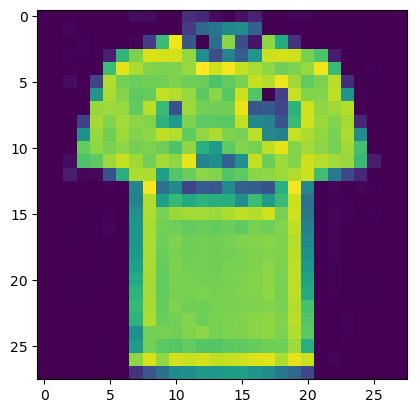

In [18]:
images = x_test.reshape(x_test.shape[0],28,28)
plt.imshow(images[0])

313/313 [==============================] - 2s 7ms/step
Coat


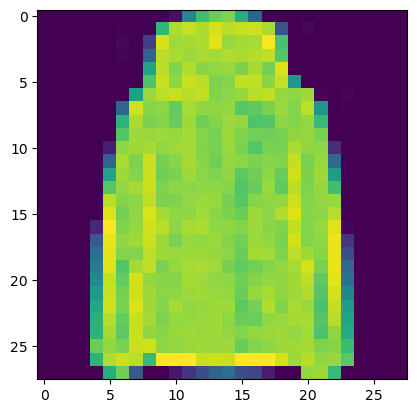

In [19]:
class_labels = ['T-shirt/Tops', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle-boots']

n=np.random.randint(0,500)
plt.imshow(images[n])
predicted_values=model.predict(x_test)
print(class_labels[np.argmax(predicted_values[n])])

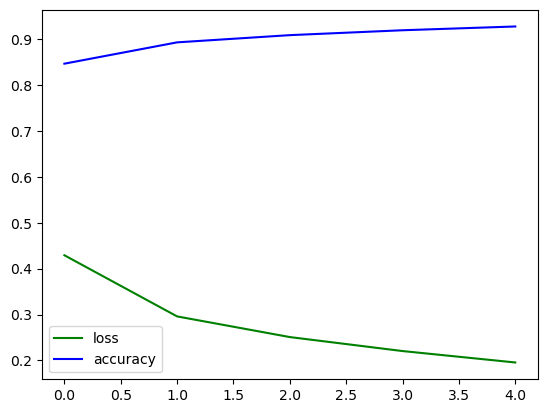

In [20]:
plt.plot(hist.history['loss'],label='loss',color='g')
plt.plot(hist.history['accuracy'],label='accuracy',color='b')
plt.legend()
plt.show()